In [158]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter

In [159]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [160]:
#Import CSVs

df = pd.read_csv(Path('../Clean Data/CPI_cleaned.csv'))
df.head()

,Unnamed: 0,Month,Year,CPI
0,1128,1,2007,202.416
1,1129,2,2007,203.499
2,1130,3,2007,205.352
3,1131,4,2007,206.686
4,1132,5,2007,207.949


In [161]:
#dropping unamed column
#url: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Month,Year,CPI
0,1,2007,202.416
1,2,2007,203.499
2,3,2007,205.352
3,4,2007,206.686
4,5,2007,207.949
...,...,...,...
170,3,2021,264.877
171,4,2021,267.054
172,5,2021,269.195
173,6,2021,271.696


In [162]:
# plt.scatter(df.Year, df.CPI)
# plt.xlabel('Year')
# plt.ylabel('CPI')
# plt.show()

In [163]:
# df = pd.DataFrame('x', index=range(5), columns=list('abc'))

In [164]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df.Year.values.reshape(-1, 1)

In [165]:
X[:5]

array([[2007],
       [2007],
       [2007],
       [2007],
       [2007]], dtype=int64)

In [166]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(175, 1)

In [167]:
y = df.CPI
y.head()

0    202.416
1    203.499
2    205.352
3    206.686
4    207.949
Name: CPI, dtype: float64

In [157]:
#url: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1,
                                                   stratify=y)
X_train.shape
Counter(y_train)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [120]:
# Create a model with scikit-learn
model = LinearRegression()

In [121]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [122]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(175,)


In [123]:
# # Plot the results. The best fit line is red.
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [124]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[3.89412876]
-7607.272985907337


In [62]:
# #17.3.1
# from sklearn.datasets import make_blobs
# X, y = make_blobs(centers=2, random_state=42)

# print(f"Labels: {y[:10]}")
# print(f"Data: {X[:10]}")

In [67]:
#url: https://stackoverflow.com/questions/43179429/scikit-learn-error-the-least-populated-class-in-y-has-only-1-member

# train, xtest, ytrain, ytest = train_test_split(X, y.iloc[:,1], 
#                                                test_size=1/3,
#                                                random_state=85, 
#                                                stratify=y.iloc[:,1])

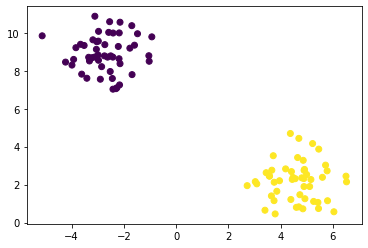

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [17]:
from sklearn.model_selection import train_test_split 
                                        #used to split a dataset
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1) #instantiate
classifier

LogisticRegression(random_state=1)

In [19]:
#let's breakdown each of these components later

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)

In [20]:
#train the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [21]:
#create predictions and assemble dataframe
predictions = classifier.predict(X_test)
    # predict() creates predictions based on X_test

pd.DataFrame({"Prediction": predictions, "Actual": y_test})
    #creates a datframe of predicted values and actual values

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

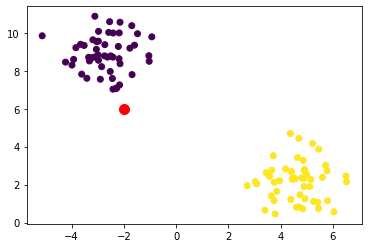

In [23]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [24]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]
